<a href="https://colab.research.google.com/github/kamaevdaniil/ML_labs/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

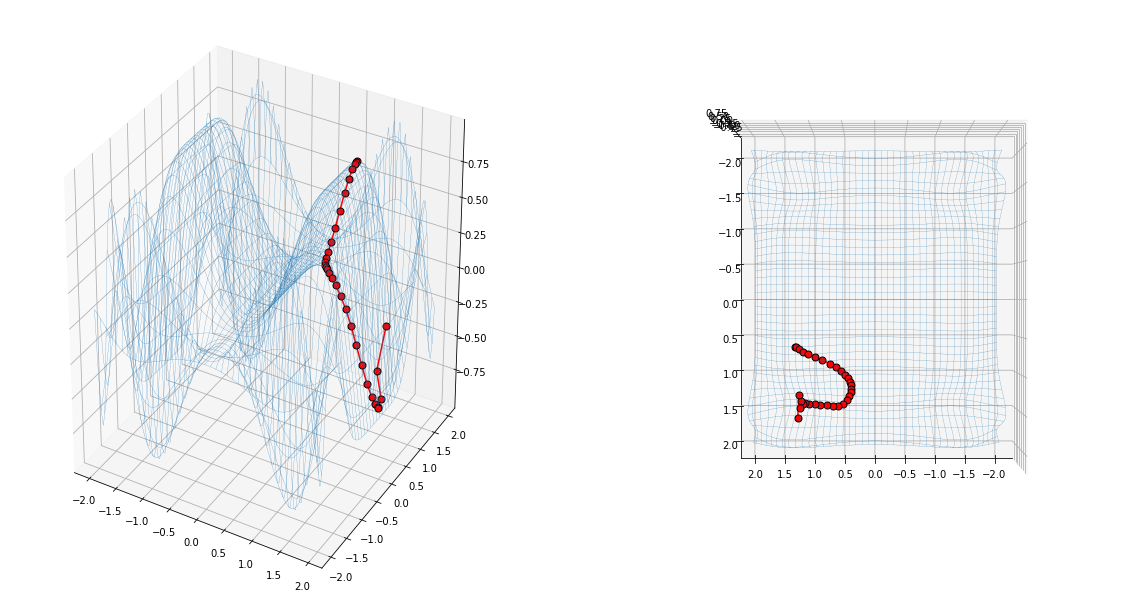

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import math
x = sym.Symbol('x')
y = sym.Symbol('y')
def f(x, y):
    return np.sin(x**2) * np.cos(y**3)
func = sym.sin(x**2) * sym.cos(y**3)

def grad(func, vector):
    
    dx = sym.diff(func, x)
    dy = sym.diff(func, y)
    
    return np.array([
        dx.subs([
            (x, vector[0]),
            (y, vector[1])
        ]), 
        dy.subs([
            (x, vector[0]),
            (y, vector[1])
        ])
    ], dtype='float64')

def dynamic_lr(func, start_point, learning_rate=0.01, initial_learning_rate=0.1, decay=0.01, iterations=10, epsilon=1e-10):
    
    vector = np.array(start_point, dtype='float64')
        
    res = []
    res.append(vector)
    
    for epoch in range(iterations):
        g = grad(func, vector)
        
        diff = -learning_rate * g
        
        if np.linalg.norm(g) <= epsilon:
            break

        learning_rate = initial_learning_rate * (1/(1 + decay * epoch))
        
        vector = vector + diff
        res.append(vector)

    return np.array(res)


def plot(res):
    fig=plt.figure(figsize=(20,11))
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-2, 2, 0.05)

    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    ax1.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.2)
    ax2.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.2)

    ax2.view_init(90, 90)

    

    X = np.concatenate(res[:, [0]])
    Y = np.concatenate(res[:, [1]])
    Z = f(X, Y)

    ax1.plot(X, Y, Z, color='r', marker='o', markersize=7, markeredgecolor='k')
    ax2.plot(X, Y, Z, color='r', marker='o', markersize=7, markeredgecolor='k')

    plt.show()
res = dynamic_lr(func, [1.2, 0.6], iterations=30, learning_rate=0.05)
plot(res)